In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [2]:
df= pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x= df.iloc[:,3:-1]
y= df.iloc[:, -1]

In [4]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
x.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [7]:
x['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
# Encoding
x= pd.get_dummies(x, columns= ['Geography', 'Gender'], drop_first=True)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 654.4 KB


In [11]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)
pd.DataFrame(x_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809,-1.095988
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740,-1.095988
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809,-1.095988
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809,-1.095988
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.578736,-0.573809,0.912419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.578736,-0.573809,0.912419
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,-0.578736,-0.573809,-1.095988
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.727904,-0.573809,0.912419


In [12]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state=1)

In [14]:
model=Sequential()
model.add(Dense(256, activation='relu', input_dim=11))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200)

Epoch 1/200
250/250 [==============================] - 9s 6ms/step - loss: 0.4642 - accuracy: 0.7939 - val_loss: 0.3713 - val_accuracy: 0.8475
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3715 - accuracy: 0.8446 - val_loss: 0.3730 - val_accuracy: 0.8490
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3549 - accuracy: 0.8524 - val_loss: 0.3623 - val_accuracy: 0.8490
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3434 - accuracy: 0.8595 - val_loss: 0.3695 - val_accuracy: 0.8515
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3381 - accuracy: 0.8620 - val_loss: 0.3638 - val_accuracy: 0.8535
Epoch 6/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3324 - accuracy: 0.8585 - val_loss: 0.3532 - val_accuracy: 0.8615
Epoch 7/200
250/250 [==============================] - 2s 7ms/step - loss: 0.3254 - accuracy: 0.8643 - val_loss: 0.3706 - val_accuracy: 0.8470

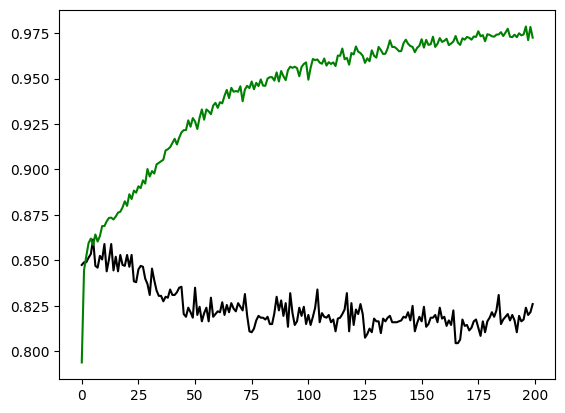

In [17]:
plt.plot(history.history['val_accuracy'], color='black')
plt.plot(history.history['accuracy'], color='green')

In [18]:
# Without batch normalization
model1=Sequential()
model1.add(Dense(256, activation='relu', input_dim=11))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1= model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200)

Epoch 1/200
250/250 [==============================] - 3s 5ms/step - loss: 0.3998 - accuracy: 0.8350 - val_loss: 0.3368 - val_accuracy: 0.8645
Epoch 2/200
250/250 [==============================] - 1s 6ms/step - loss: 0.3480 - accuracy: 0.8565 - val_loss: 0.3409 - val_accuracy: 0.8575
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3423 - accuracy: 0.8595 - val_loss: 0.3350 - val_accuracy: 0.8595
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8587 - val_loss: 0.3389 - val_accuracy: 0.8605
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3258 - accuracy: 0.8648 - val_loss: 0.3450 - val_accuracy: 0.8585
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3244 - accuracy: 0.8665 - val_loss: 0.3374 - val_accuracy: 0.8650
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.3170 - accuracy: 0.8681 - val_loss: 0.3420 - val_accuracy: 0.8655

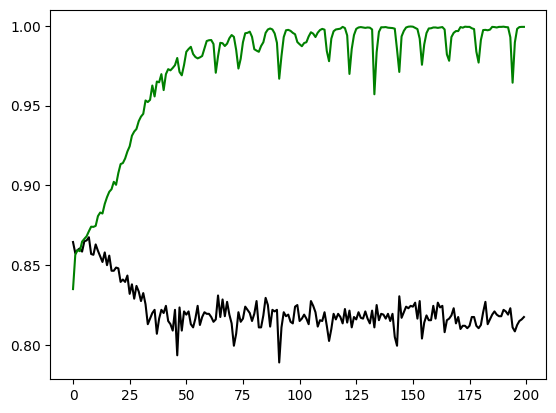

In [19]:
plt.plot(history1.history['val_accuracy'], color='black')
plt.plot(history1.history['accuracy'], color='green')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
callback= EarlyStopping(monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

In [25]:
model2=Sequential()
model2.add(Dense(256, activation='relu', input_dim=11, kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(BatchNormalization())
model2.add(Dense(1, activation='sigmoid'))

In [27]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2= model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, callbacks= callback)

Epoch 1/2000
250/250 [==============================] - 4s 6ms/step - loss: 0.4820 - accuracy: 0.8426 - val_loss: 0.4389 - val_accuracy: 0.8415
Epoch 2/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.4551 - accuracy: 0.8419 - val_loss: 0.5775 - val_accuracy: 0.8335
Epoch 3/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.4545 - accuracy: 0.8418 - val_loss: 0.5818 - val_accuracy: 0.7845
Epoch 4/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.4430 - accuracy: 0.8444 - val_loss: 0.4775 - val_accuracy: 0.8375
Epoch 5/2000
250/250 [==============================] - 1s 5ms/step - loss: 0.4360 - accuracy: 0.8428 - val_loss: 0.4138 - val_accuracy: 0.8540
Epoch 6/2000
250/250 [==============================] - 1s 6ms/step - loss: 0.4207 - accuracy: 0.8482 - val_loss: 0.4067 - val_accuracy: 0.8440
Epoch 7/2000
250/250 [==============================] - 2s 7ms/step - loss: 0.4141 - accuracy: 0.8438 - val_loss: 0.3953 - val_accuracy:

In [ ]:
plt.plot(history2.history['val_accuracy'], color='black')
plt.plot(history2.history['accuracy'], color='green')